# `Lab 2: Test The Trained Model With Your Own Handwritten Digit Images.`

### `1. Read files`

In [11]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

files = glob.glob('digits/*.png')
print(files)

['digits/8.png', 'digits/9.png', 'digits/4.png', 'digits/5.png', 'digits/7.png', 'digits/6.png', 'digits/2.png', 'digits/3.png', 'digits/1.png', 'digits/0.png']


### `2. Read images`

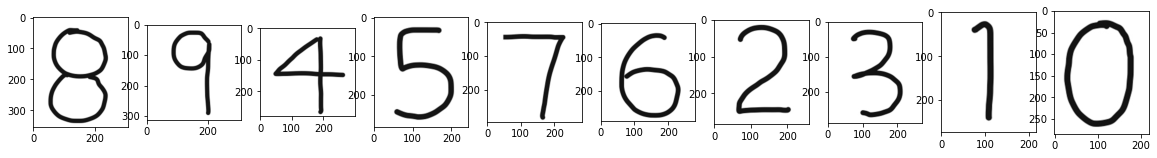

In [12]:
digits = []
fig, axes = plt.subplots(nrows=1, ncols=len(files), figsize=(20, 5))
for i, file in enumerate(files):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    digits.append(img)
    axes[i].imshow(img, cmap='gray')


### `3. Generate label`

In [13]:
labels = []
labels = [int(file.split('/')[1][0]) for file in files]
print(labels)

[8, 9, 4, 5, 7, 6, 2, 3, 1, 0]


### `4. Check the loaded images`

40 255


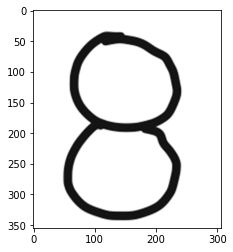

In [14]:
plt.imshow(digits[0], cmap='gray')
print(digits[0].min(), digits[0].max())

### `5. Binary threshoding and resizing is needed`

0 255


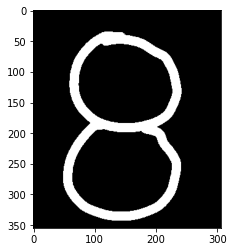

In [15]:
digits_final = []
for digit in digits:
    digit_new = np.where(digit < 200, 255, 0).astype(np.uint8)
    digits_final.append( digit_new)
plt.imshow(digits_final[0], cmap='gray')
print(digits_final[0].min(), digits_final[0].max())

### `6. Resize and normalize them`

In [16]:
for i, digit in enumerate(digits_final):
    img = cv2.resize(digit, (28, 28)).flatten() / 255
    digits_final[i] =img

digits_final = torch.tensor(np.array(digits_final), dtype=torch.float32)

print(digits_final.shape, digits_final.min().item(), digits_final.max().item())

torch.Size([10, 784]) 0.0 1.0


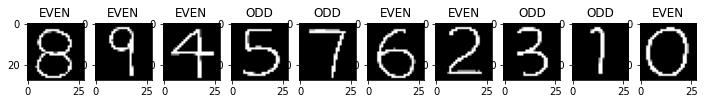

In [18]:
# Load model and Testing
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class EvenOddClassifier(nn.Module):
    def __init__(self):
        super(EvenOddClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # Reshape input to [batch_size, channels, height, width]
        x = x.view(-1, 1, 28, 28)  # Assuming input images are of size 28x28
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델을 초기화합니다.
model = EvenOddClassifier()

# 불러온 state_dict를 모델에 적용합니다.
model.load_state_dict(torch.load('model_mnist_even_odd.pth'))

# 모델을 평가 모드로 변경합니다.
model.eval()


outputs = model(digits_final.to(device))
preds = torch.sigmoid(outputs)
preds = preds >= 0.5 #0:even, 1:odd


text_labels = ['EVEN', 'ODD']
fig, axs = plt.subplots(1,10,figsize=(12, 12))

for i in range(10):
    axs[i].imshow(digits_final[i].reshape((28, 28)).cpu().numpy(), cmap='gray')
    axs[i].set_title(text_labels[preds[i].int()])
    


In [ ]:
labels = np.array(labels)%2
preds = preds.int().squeeze().cpu().numpy()

acc = (labels == preds).sum() / 10
print(labels)
print(preds)
print(f'accuracy={acc}')


[0 1 0 1 0 1 0 1 0 1]
[0 1 0 1 0 1 1 1 0 1]
accuracy=0.9
